# Exploratory Data Analysis for Horse Racing Dataset for Experts (Hong Kong)
    
1. <b> Research question: </b> Given a set of features related to racing horses, can we predict the outcome of a race?
    

## Summary

* A good portion of our EDA time was spent wrangling and combining the raw data into one megasheet. With barrier.csv data (training race times) and results.csv (actual race times) combined row-wise and horse-info.csv and comments.csv combined column wise. 
* There seems to be no one specific feature that highly correlates to the placement of the races so far. 
 

In [2]:
# Load packages

import pandas as pd
import altair as alt
import numpy as np
import pandas_profiling as pandas_profiling
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Wrangling

In [3]:
#Read in files for merging

results= pd.read_csv('../data/raw_files/results.csv')
barrier = pd.read_csv('../data/raw_files/barrier.csv')
comments = pd.read_csv('../data/raw_files/comments.csv')
horse_info = pd.read_csv('../data/raw_files/horse_info.csv')

In [4]:
#Merging fixing
results['dataset'] = 'results'
results_comments = pd.merge(results, comments, how="left", on=["horseno", "date", "raceno", "plc"])

#Rename barrier time which is the same as finish time in results
barrier.rename(columns={'time': 'finishtime'})
barrier['dataset'] = 'barrier'
barrier_binded = pd.concat([results_comments, barrier], axis=0, ignore_index=False, sort=False)
    
merged_data= pd.merge(barrier_binded, horse_info, how='left', on= ['horse'])

#Removed the columns with _ch as this indicated Chinese.
final_data = merged_data[merged_data.columns[~merged_data.columns.str.contains('.*_ch')]]

#Drop repeated columns and unnessary indexes
final_data =final_data.drop(['trainer_y','Unnamed: 0_x' ,'Unnamed: 0_y'], axis=1)
final_data['date']= pd.to_datetime(final_data['date'])
final_data["plc"].unique()

array(['1', '1 DH', '2', '2 DH', '3', '3 DH', '4', '4 DH', '5', '5 DH',
       '6', '6 DH', '7', 'WV', '7 DH', '8', '8 DH', '9', 'PU', '9 DH',
       '10', 'UR', 'WV-A', '11', 'FE', 'DNF', '12', 'WX', 'TNP', '13',
       nan, 'WX-A', '14', 5, 3, 10, 9, 4, 1, 6, 7, 8, 2, 11, 13, 12, 14],
      dtype=object)

### Splitting up our merged data into test and train datasets

In [5]:
train_data, test_data = train_test_split(final_data,
                                             random_state=1,
                                             test_size=0.2,
                                             shuffle=True)

### Data exploration

In [6]:
# Import training set
#train_data = pd.read_csv('../data/data_train.csv')
train_data.head()

,row,plc,horseno,horse,jockey,trainer_x,actualwt,declarwt,draw,lbw,...,country,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
21818,NaN,3,NaN,SPICY KAKA(V323),K Teetan,J Moore,NaN,NaN,2.0,2-1/2L,...,GB,Bay,Gelding,Kathleen Shi Pui Ka,ISG,57.0,51.0,Excellent Art,Cheap Thrills,5.0
7569,6.0,7,9.0,DIAMOND MASTER(S397),K C Leung,P F Yiu,116.0,1156.0,8.0,4-1/2,...,AUS,Bay,Gelding,HK Diamond Bourse Racing Syndicate,PPG,68.0,69.0,Not A Single Doubt,Sandy Desert,6.0
12339,11.0,12,5.0,TARZAN I AM(P299),C Y Ho,D Cruz,125.0,1224.0,14.0,12,...,NZ,Bay,Gelding,Fok Yuk Tong,PP,NaN,NaN,Darci Brahma,Climb The Vine,NaN
12719,11.0,12,4.0,AIMING HIGH(V206),M L Yeung,T P Yung,124.0,1149.0,8.0,19,...,NZ,Bay,Gelding,"Terence Leung Chi Kin, Patrick Wong Man Kam, J...",PP,NaN,NaN,Captain Rio,Kiwi Supreme,NaN
8117,7.0,8,6.0,PLANET STAR(A049),S de Sousa,P O'Sullivan,125.0,1182.0,6.0,5-1/2,...,AUS,Brown,Gelding,Planet Racing Syndicate,PPG,50.0,52.0,Denman,Tell Someone,4.0


<b> We can observe what information is provided from our merged dataset for one race. <b>

In [7]:
# View what one race data section looks like
train_data.query("date=='2016-01-09' and raceno==1").sort_values(by=['row'])

,row,plc,horseno,horse,jockey,trainer_x,actualwt,declarwt,draw,lbw,...,country,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
1152,1.0,2,4.0,THUNDER DASH(T133),S de Sousa,P F Yiu,126.0,1063.0,8.0,3-1/4,...,AUS,Bay,Gelding,Mr & Mrs Chan Ting Leung,PPG,NaN,NaN,Sebring,Princess Ola,NaN
4494,4.0,5,1.0,GORGEOUS LEGEND(T122),H W Lai,C S Shum,132.0,1113.0,5.0,4-1/4,...,AUS,Bay,Gelding,Yip Kong Wah,PP,NaN,NaN,Hard Spun,La Carmencita,NaN
6719,6.0,7,10.0,HEAVENLY MASTERS(V006),D Whyte,A S Cruz,120.0,1092.0,1.0,5-3/4,...,AUS,Bay,Gelding,So Shun,PPG,NaN,NaN,Freeze,Sprung,NaN
7825,7.0,8,12.0,ALL IS WELL(T240),R Fourie,S Woods,118.0,1025.0,7.0,6-1/2,...,NZ,Bay,Gelding,Michael Lee To Ming & Lawrence Lee To Fu,PP,NaN,NaN,Seasoned Star,Bloody Mary,NaN
8926,8.0,9,6.0,GOLDEN CANNON(T022),Y T Cheng,D Cruz,124.0,978.0,11.0,6-3/4,...,AUS,Bay,Gelding,Stanley Chan Ka Leung,PPG,28.0,24.0,Danzero,Dance Hit,6.0
10018,9.0,10,2.0,SUPER SWEET ORANGE(V058),C Schofield,D E Ferraris,132.0,1235.0,12.0,7,...,NZ,Bay,Gelding,Tong Wang Chow,PP,NaN,NaN,Zabeel,Salsa,NaN
11095,10.0,11,7.0,SHOW MISSION(T436),V Cheminaud,Y S Tsui,124.0,1088.0,9.0,7-1/2,...,NZ,Bay,Gelding,Wong Kiam Seng,PPG,41.0,37.0,Showcasing,Olga Palosky,5.0
12151,11.0,12,8.0,WORLD RECORD(V040),K Teetan,A T Millard,124.0,1060.0,10.0,9-1/4,...,NZ,Brown,Gelding,William Ching Hon Kuen & Raymond Ching Wei Man,PPG,82.0,73.0,Savabeel,Run Brony Run,5.0


In [8]:
train_data.query("date=='2017-07-14' and raceno==1").sort_values(by=['plc']) # select a specific race from barrier trials.

,row,plc,horseno,horse,jockey,trainer_x,actualwt,declarwt,draw,lbw,...,country,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
14414,NaN,2,NaN,ALL YOU KNOW(A320),C Schofield,R Gibson,NaN,NaN,3.0,2-3/4L,...,IRE,Grey,Gelding,Eric Ng Wing Kwong,ISG,47.0,57.0,Dark Angel,Marseille Express,4.0
18485,NaN,3,NaN,IMPECCABLE FELLOW(A310),C Murray,R Gibson,NaN,NaN,2.0,6-1/2L,...,IRE,Bay,Gelding,Frank Lyn Yee Chon & Ivy Lai,ISG,54.0,57.0,Acclamation,Moment Juste,4.0
22874,NaN,4,NaN,VICTORIOUS ANTHEM(A256),K Teetan,D J Hall,NaN,NaN,1.0,7-3/4L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#train_data.profile_report() #dataset too big so will not load -ck
#horse_info.describe()
#print("The dataframe columns are: ", list(horse_info.columns), "\n")
train_data.describe()

,row,horseno,actualwt,declarwt,draw,winodds,raceno,class,distance,stake,current_rating,start_rating,age
count,11285.000000,11146.000000,11284.000000,11251.000000,18508.000000,11050.000000,18744.000000,11285.000000,18744.000000,1.128500e+04,9144.000000,9144.000000,9144.000000
mean,5.976961,6.865781,122.853952,1109.069327,6.228712,30.118941,4.700811,3.453257,1202.934272,1.301544e+06,61.468285,62.370297,5.960083
std,3.806700,3.737905,6.385524,61.416600,3.527772,31.637545,2.873232,1.028424,433.442574,2.048077e+06,23.807324,22.640663,1.191517
min,0.000000,1.000000,103.000000,902.000000,1.000000,1.200000,1.000000,1.000000,150.000000,5.750000e+05,3.000000,18.000000,3.000000
25%,3.000000,4.000000,118.000000,1066.000000,3.000000,7.700000,2.000000,3.000000,1000.000000,8.000000e+05,44.000000,46.000000,5.000000
50%,6.000000,7.000000,123.000000,1107.000000,6.000000,16.000000,4.000000,4.000000,1200.000000,8.400000e+05,60.000000,61.000000,6.000000
75%,9.000000,10.000000,128.000000,1151.000000,9.000000,40.000000,7.000000,4.000000,1600.000000,1.235000e+06,76.000000,76.000000,7.000000
max,15.000000,14.000000,133.000000,1365.000000,14.000000,99.000000,13.000000,5.000000,2400.000000,2.500000e+07,130.000000,128.000000,10.000000


### Comments on the pandas profiling

We have 12 numerical variables and 22 categorical variables
 
* Due to our merging process we observe a lot of missing values

* Highly correlated features initially seen are current_rating with start_rating, stake with current_rating. Some other lower correlated features include declared weight with start_rating, row and winodds, age and distance.

* These should be further looked into and although these correlations aren't very high these features should be considered when answering our research question.

### More data exploration

In [10]:
print("The dataframe columns are: ", list(train_data.columns), "\n")

list_horse_names = (sorted(set(train_data['horse'])))
print("- There are {0} number of horses in the train dataset.".format(len(list_horse_names)),"\n")

trainer_names = (sorted(set(train_data['trainer_x'])))
print("- There are {0} unique trainers in the train dataset.".format(len(trainer_names)),"\n")

print('- There countries the horses are from are:.', (train_data['country'].unique()),"\n")

age_list = sorted(list(train_data['age'].unique()))
print("- The age of the horses ranges from {0} to {1}".format(age_list[0],
                                                                    age_list[-1]), "\n")
#years_list = sorted(list(train_data['date'].unique()))
#print("- The years range from {0:.0f} to {1:.0f} and there are {2} years.".format(years_list[0],
                                                                          # years_list[-1],                                                                        len(years_list)),"\n")

The dataframe columns are:  ['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer_x', 'actualwt', 'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds', 'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course', 'stake', 'venue', 'dataset', 'gear', 'comment', 'time', 'result', 'country', 'colour', 'sex', 'owner', 'import_type', 'current_rating', 'start_rating', 'sire', 'dam', 'age'] 

- There are 1962 number of horses in the train dataset. 

- There are 69 unique trainers in the train dataset. 

- There countries the horses are from are:. ['GB' 'AUS' 'NZ' 'USA' 'IRE' nan 'ITY' 'SAF' 'FR' 'GER' 'CAN' 'JPN' 'ARG'
 'SPA'] 

- The age of the horses ranges from 3.0 to 10.0 



## Visualizations

### Checking for Null values in dataset

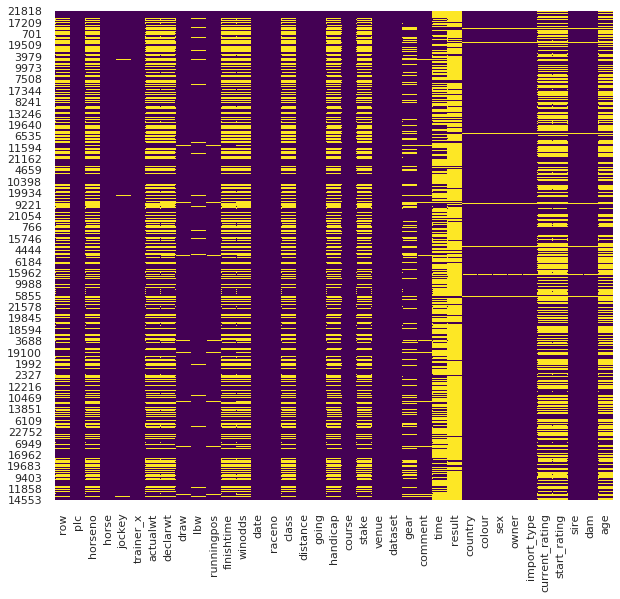

In [11]:
sns.set(rc= {'figure.figsize':(10, 9)})
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False)

> This null plot shows that the yellow marks the areas with null values, as you can see there are many columns with NA's which occurred during our merging process. From the heat map above we found there to be a lot of null values in the merged dataset that should be removed. 

### Correlation Heat Map

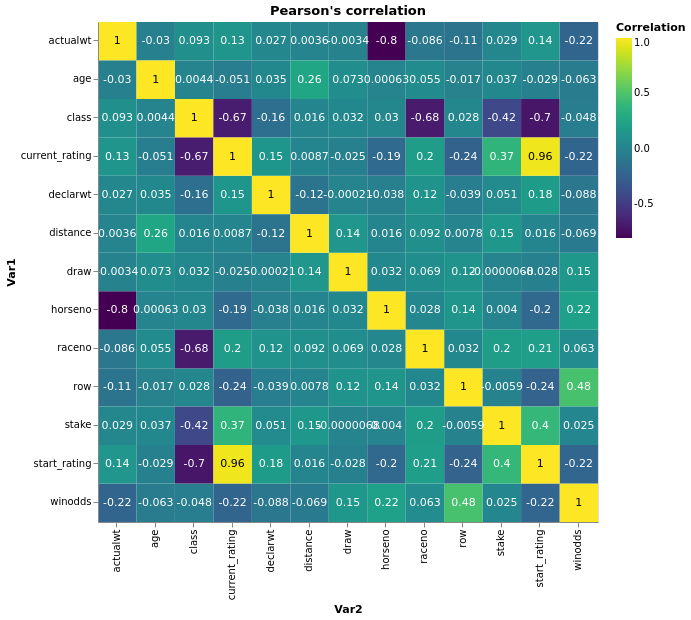

In [12]:
vehicles_corr = train_data.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
base = alt.Chart(vehicles_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2'),
    color=alt.condition(
        alt.datum.Correlation >= 0.90,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 500,
    height = 500,
    title = "Pearson's correlation"
)
#change the values to look at different feature correlations 

In [13]:
train_data = train_data[~train_data['plc'].isna()]
alt.data_transformers.enable('json')


DataTransformerRegistry.enable('json')

/home/dkruszew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dkruszew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


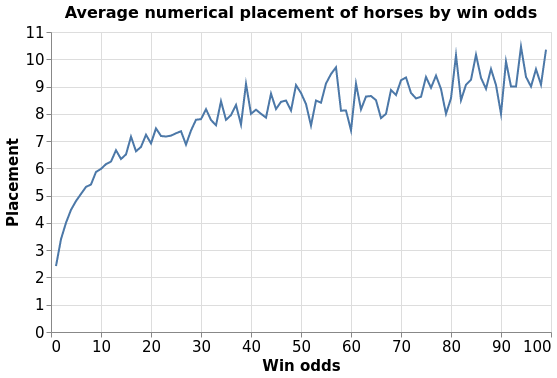

In [14]:
# Plot1 visualize class vs the place they were in 
filtered_pos_df = train_data[train_data["plc"].isin([str(x) for x in range(0, 20)])]
filtered_pos_df["plc"] = filtered_pos_df["plc"].apply(lambda x: int(x))
filtered_pos_df["winodds"] = filtered_pos_df["winodds"].apply(lambda x: int(x))

alt.Chart(filtered_pos_df.groupby("winodds").mean().reset_index()).mark_line().encode(
    x=alt.X('winodds:Q', scale=alt.Scale(zero=False), title="Win odds"),
    y=alt.Y('plc:Q', title="Placement"),
).properties(width=500, height=300, title='Average numerical placement of horses by win odds'
).configure_axis(titleFontSize=15, labelFontSize=15
).configure_title(fontSize=16)

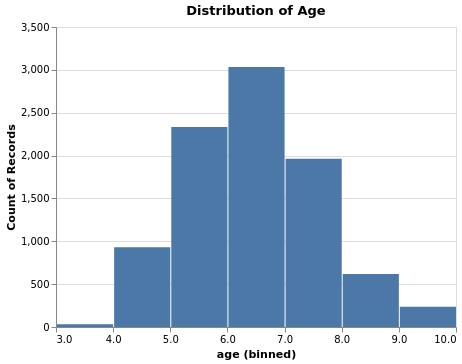

In [15]:
alt.Chart(train_data).mark_bar().encode(
    alt.X("age", bin=True),
    y='count()',
).properties(
    title= 'Distribution of Age')

In [16]:
train_data.columns

Index(['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer_x', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue', 'dataset', 'gear', 'comment', 'time', 'result',
       'country', 'colour', 'sex', 'owner', 'import_type', 'current_rating',
       'start_rating', 'sire', 'dam', 'age'],
      dtype='object')

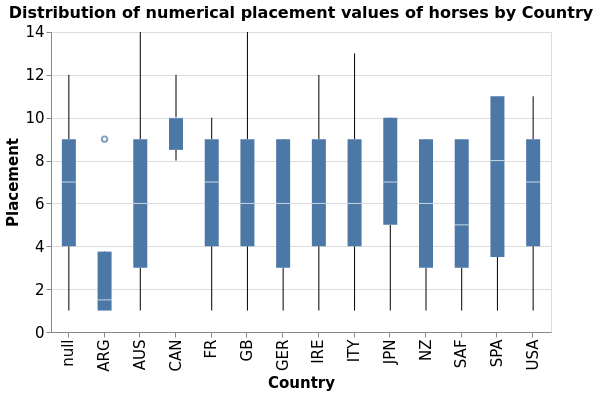

In [17]:
alt.Chart(train_data).mark_boxplot().encode(
    x=alt.X('country:N', title = "Country"),
    y=alt.Y('plc:Q', title = "Placement")
).properties(height=300, width= 500, title="Distribution of numerical placement values of horses by Country"
).configure_axis(titleFontSize=15, labelFontSize=15
).configure_title(fontSize=16)

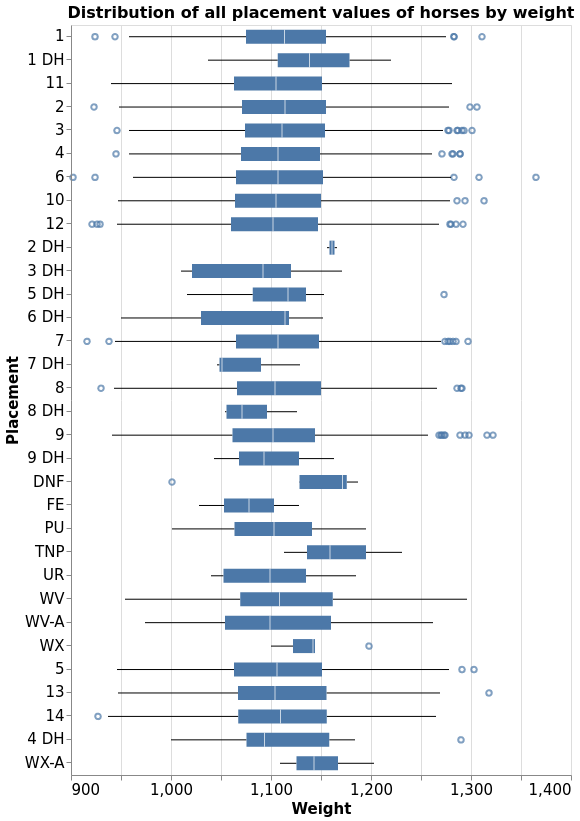

In [18]:
alt.Chart(train_data).mark_boxplot().encode(
    x=alt.X('declarwt:Q', scale=alt.Scale(zero=False), title="Weight"),
    y=alt.Y('plc:N', title="Placement")
).properties(height=750, width= 500, title="Distribution of all placement values of horses by weight"
).configure_axis(titleFontSize=15, labelFontSize=15
).configure_title(fontSize=16)